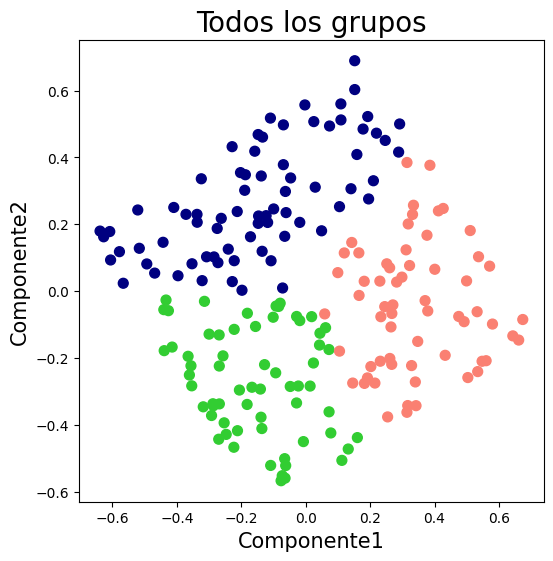

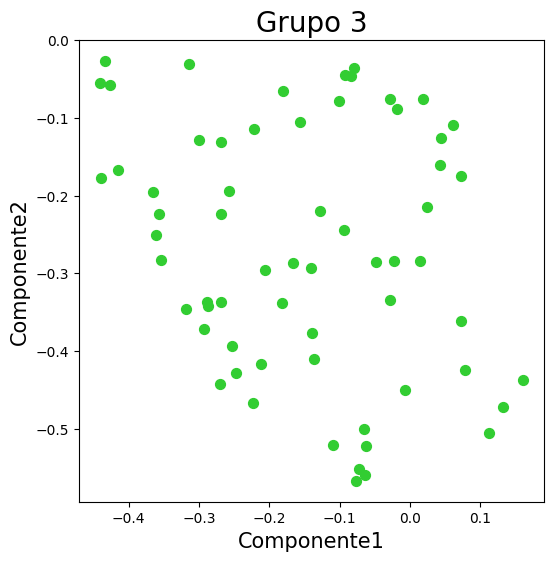

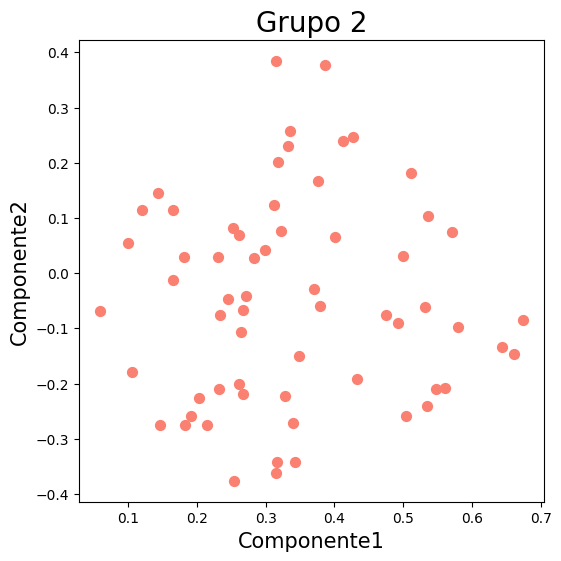

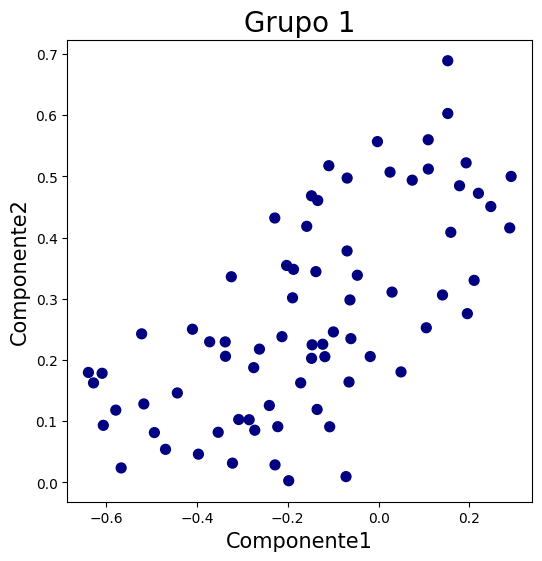

In [2]:
#Importar librerias
from tkinter import Tk,Frame,Label,Checkbutton,Button,IntVar,Canvas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tkinter import messagebox
from sklearn.cluster import kmeans_plusplus
from tkinter import filedialog

# Leemos el archivo csv con los datos de las BTS
bts = pd.read_csv(r'BTS.csv',engine='python')

# bts.info()

# bts.head()

# bts.describe()

# Normalizamos los datos para que sean como maxima 1 y como minimo 0
bts_norm = (bts-bts.min()) / (bts.max() - bts.min())

# Calculamos cuantos cluster serian los mas optimos para los datos obtenidos
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i,max_iter = 300)
#     kmeans.fit(bts_norm)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1,11),wcss)
# plt.title("Codo de Jambu")
# plt.xlabel("Numero de Clusters")
# plt.ylabel("WCSS")
# plt.show()

# Creamos 3 Cluser y ponemos el esquema de inicializacion k-means++
# k-means = Inicializa los centroides para que estén (generalmente)
# distantes entré si, lo que conduce problablemente a mejores resultados
# que la inicialización aleatoria. 
clustering = KMeans(n_clusters=3,max_iter=300,init='k-means++',n_init="auto")
# Metemos los datos en los clusers
clustering.fit(bts_norm)
# centros = clustering.cluster_centers_

bts['KMeans_clustering'] = clustering.labels_
# bts.head()

# Ejecutamos un algoritmo de reducción de dimensionalidad PCA
pca = PCA(n_components = 2)
pca_bts = pca.fit_transform(bts_norm)
pca_bts_df = pd.DataFrame(data = pca_bts, columns = ['Componente_1', 'Componente_2'])
pca_nombres_bts = pd.concat([pca_bts_df, bts[['KMeans_clustering']]], axis = 1)

# Guardamos los datos en un archivo cvs
bts.to_csv('K-Means.csv')

# Guardamos los datos normalizados para poder hacer consultas sobre ese csv
# e ir sacando una parte de los cluster
pca_nombres_bts.to_csv('K-MeansValues.csv')


# Leemos este nuevo csv
datos = pd.read_csv(r'K-MeansValues.csv',header = 0)

# centers_init, indices = kmeans_plusplus(X, n_clusters=3, random_state=0)
# print(datos['KMeans_clustering'])

# print(datos)

# insertar las graficas en el canvas
def drawGraf(fig,miFrame):
        canvas = FigureCanvasTkAgg(fig,master=miFrame)
        canvas.draw()
        canvas.get_tk_widget().grid(row=6,column=5)

# Guardamos la grafica en el directorio y con el nombre que introduce el usuario
def guardarFile(plt):
    file = filedialog.asksaveasfilename(
        filetypes=[("png file", ".png")],
        defaultextension=".png",
        initialdir='.')
    if(file):
        plt.savefig(file)
        messagebox.showinfo(message="Archivo generado con exito", title="Guardado")
    else:
        messagebox.showerror(message="Error al guardar el archivo",title="Error")

#Funcion para ver los 3 clusters
def todosGrupos():

    # Creamos la grafica para ver las colecciones
    fig = plt.figure(figsize = (6,6))
   
    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('Componente1', fontsize=15)
    ax.set_ylabel('Componente2', fontsize=15)
    ax.set_title('Todos los grupos', fontsize=20)

    color_theme = np.array(["navy", "salmon", "limegreen"])

    ax.scatter(x = pca_nombres_bts.Componente_1, y = pca_nombres_bts.Componente_2,
            c = color_theme[pca_nombres_bts.KMeans_clustering], s = 50)
    
    if(op0.get() == 1):
        guardarFile(plt)
    else:
        drawGraf(fig,miFrame)

# Funcion para ver solo los datos del primer cluster
def grupo1Graf():

    # print(datos.loc[datos['KMeans_clustering'] == 0])
    datosGrupo1 = datos.loc[datos['KMeans_clustering'] == 0]
 
    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Componente1', fontsize=15)
    ax.set_ylabel('Componente2', fontsize=15)
    ax.set_title('Grupo 1', fontsize=20)

    color_theme = np.array(["navy"])

    ax.scatter(x = datosGrupo1.Componente_1, y = datosGrupo1.Componente_2,
           c = color_theme[datosGrupo1.KMeans_clustering], 
        #    c = "navy",
           s = 50)    

    if(op1.get() == 1):
       guardarFile(plt)
    else:
       drawGraf(fig,miFrame)   

# Funcion para ver solo los datos del segundo cluster
def grupo2Graf():
    
    # print(datos.loc[datos['KMeans_clustering'] == 1])

    datosGrupo2 = datos.loc[datos['KMeans_clustering'] == 1]

    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Componente1', fontsize=15)
    ax.set_ylabel('Componente2', fontsize=15)
    ax.set_title('Grupo 2', fontsize=20)

    ax.scatter(x = datosGrupo2.Componente_1, y = datosGrupo2.Componente_2,
           c = "salmon", s = 50)

    if(op2.get() == 1):
        guardarFile(plt)
    else:
        drawGraf(fig,miFrame)    

# Funcion para ver solo los datos del tercer cluster
def grupo3Graf():
    
    datosGrupo3 = datos.loc[datos['KMeans_clustering'] == 2]

    fig = plt.figure(figsize = (6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Componente1', fontsize=15)
    ax.set_ylabel('Componente2', fontsize=15)
    ax.set_title('Grupo 3', fontsize=20)


    ax.scatter(x = datosGrupo3.Componente_1, y = datosGrupo3.Componente_2,
            c = "limegreen",
           s = 50)    
    # ax.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
    
    if(op3.get() == 1):
       guardarFile(plt)
    else:
        drawGraf(fig,miFrame)   


def cerrar():
    close = messagebox.askyesno(
        message="¿Está seguro de que quiere cerrar la aplicación?",
        title="Confirmar cierre"
    )
    if close:
        app.destroy()

# Creamos la interfaz grafica
app = Tk()
app.title("Agrupacion de BTS")
app.geometry("1200x800")

# Creamos un frame 
miFrame = Frame(app)

# Lo empaquetamos
miFrame.pack()

# Creamos un titulo y lo situamos en la pantall
tituloLabel = Label(miFrame,text="Agrupaciones")
tituloLabel.grid(row=1,column=3)

# Creamos un boton para ver la la imagen 1 y lo situamos en la pantall
grupo1Btn = Button(miFrame,text="Grupo 1",command=grupo1Graf)
grupo1Btn.grid(row=2,column=2)

# Creamos un boton para ver la imagen 2 y lo situamos en la pantalla
grupo2Btn = Button(miFrame,text="Grupo 2",command=grupo2Graf)
grupo2Btn.grid(row=2,column=3)

# Creamos un buton para ver la imagen 3 y lo situamos en la pantalla
grupo3Btn = Button(miFrame,text="Grupo 3",command=grupo3Graf)
grupo3Btn.grid(row=2,column=4)

# Creamos un buton para ver la imagen con todos los grupos y lo situamos en la pantalla
totalBtn = Button(miFrame,text="Todos los grupos",command=todosGrupos)
totalBtn.grid(row=4,column=3)


op0 = IntVar()
op1Check = Checkbutton(miFrame,text="Guardar imagen",variable=op0)
op1Check.grid(row=5,column=3)

op1 = IntVar()
op1Check = Checkbutton(miFrame,text="Guardar imagen",variable=op1)
op1Check.grid(row=3,column=2)

op2 = IntVar()
op1Check = Checkbutton(miFrame,text="Guardar imagen",variable=op2)
op1Check.grid(row=3,column=3)

op3 = IntVar()
op1Check = Checkbutton(miFrame,text="Guardar imagen",variable=op3)
op1Check.grid(row=3,column=4)

canvas = Canvas(master=miFrame,width=600, height=600, bg='white')
canvas.grid(row=6,column=5)

app.protocol("WM_DELETE_WINDOW", cerrar)
app.mainloop()